Compounding Factor

$$
 (1+i)^{n}

$$

Discount Factor

$$
 \frac{1}{(1+i)^{n}}

$$

In [1]:
def compounding(V_0, ir, n, m = 1):
    """
    Combounding Interest Function

    :param V_0: Current Value
    :param ir: interest rate
    :param n: number of years
    :param m: number of compounding periods per year, 1 for annual, 2 for bi-annual, 12 for monthly, ....

    :return:
    """
    V_n = V_0 * ( 1 + ir/m )**( m*n )

    return round(V_n, 2)


## Task 3
1000 EUR : V_0 = 1000
10 % interest : i = 0.1
24 months : n = 2
quarterly compounding : m = 4

V_2/2 = V_0 * ( 1 + i/4)^(2*n)
1000 * ( 1 + 0.1/4 ) ^ ( 2 * 4 ) ~ 1218.40


In [9]:
V_0 = 1000 # 1000EUR
ir = 0.1 # 10 %
n = 2 # well 24 months, but this is 2 years
m = 4 # quarterly
compounding(V_0=V_0, ir=ir, n=n, m=m)

1218.4

## Example 8 - NPV

Cost of Planting (C_p) = 2400 EUR
Growth Period (n) = 60 Years
Value of Harvest (V_N) = 21973 EUR
Discount Rate ( i ) = 3%

What is the net value of the venture?

Apply Discounting for V_N

What is the forest value in todays terms?

In [10]:
def discounting(V_N, dr, n):
    """

    :param n: number of years
	:param dr: discount rate
	:param V_N: Value after n years
	:return:
	"""

    return round(V_N / ( 1 + dr )**n,2)



In [11]:
print(f"{discounting(V_N=21973, dr=0.03, n=60)}")

3729.55


How Compunding affects the value over time

In [12]:
V_0 = 1000 # 1000EUR
ir = 0.1 # 10 %
n = range(60) # well 24 months, but this is 2 years
m = 4 # quarterly

compound_per_year = [compounding(V_0=V_0, ir=ir, n=n_i, m=m) for n_i in n]

In [13]:
import pandas as pd
df_compound = pd.DataFrame({"year": n, "compound": compound_per_year})

<AxesSubplot:>

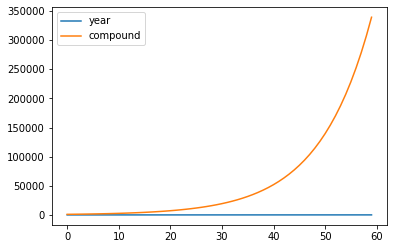

In [14]:
df_compound.plot()

## Task 7 - Buying a Car
### Option 1) Buy the car by cash - 40000EUR

### Option 2) 4 Installements of 12.000EUR each
D_1 first installement year 1 12000
D_2 first installement year 2 12000
D_3 first installement year 3 12000
D_4 first installement year 4 12000

So you pay 8000€ interest, or 20% in total
money is losing its value ( could be seen as inflation) : 10%

What is better?
V_0 = V_n * 1 / ( 1 + i )^n = V_n / ( 1 + i ) ^n

Option 2 is better, because...

In [15]:
# What is necessary is to calculate the discount. The idea, is that you only pay 12000 in the first year compared to 40000. Because of this devaluation of money is in your favour.

In [16]:
print(f"first year: {discounting(V_N=12000, dr=0.1, n=1)}")
print(f"second year: {discounting(V_N=12000, dr=0.1, n=2)}")
print(f"third year: {discounting(V_N=12000, dr=0.1, n=3)}")
print(f"fourth year: {discounting(V_N=12000, dr=0.1, n=4)}")


print(f"The value of money you by these four installements is {sum( [discounting(V_N=12000, dr=0.1, n=ni) for ni in range(1,5)])} EUR")
print(f"So it is more money efficient to buy the car via installements, even though it seems counter intuitive.")
# == 38038,39 ( Just think of this as an abstract value )

first year: 10909.09
second year: 9917.36
third year: 9015.78
fourth year: 8196.16
The value of money you by these four installements is 38038.39 EUR
So it is more money efficient to buy the car via installements, even though it seems counter intuitive.


## Example 8 - NPV
Cost of Planting (C_p) = 2400 EUR
Growth Period (n) = 60 Years
Value of Harvest (V_N) = 21973 EUR
Discount Rate ( i ) = 3%

What is the net value of the venture?
Apply Discounting for V_N
To solve this we have to calculate the value of money which we earn at harvest to todays standard.

In [17]:
C_p = 2400 # Cost of planting
n = 60 # number of years
V_N = 21973 # Value at harvest
dr = 0.03 # Discount rate


## Apply Discounting

In [18]:
disc_v = round(discounting(V_N=V_N, dr=dr, n=n), 2 )
print(f" The value is {disc_v}EUR")

print(f"Since the cost is {round(C_p,2)}EUR, we 'earn' { round(disc_v - C_p ,2)}EUR")

 The value is 3729.55EUR
Since the cost is 2400EUR, we 'earn' 1329.55EUR


## revese it and calculate the compounding variant


In [19]:
comp_v = compounding(V_0=C_p, ir=dr, n=n)

print(f"The cost 'combounded' to {comp_v}EUR, we 'earn' { round(V_N - comp_v ,2)}EUR in {n} years")

The cost 'combounded' to 14139.85EUR, we 'earn' 7833.15EUR in 60 years


TODO: This result is a bit wrong because comparing the values in 60years is not helpfull. This can be discounted again.

## Example 9

Forest Owner
area 30ha
Time frame n = 60

Option 1) natural regeneration
No Cost (C ) = 0
yield = 140m^3 per hectare
Benefit: 26EUR per m^3

Option 2)
Cost ( C ) - 1100 EUR per hectar
60 years
yield 400m^3 per hectar
Benefit: 36EUR per hectare

Discount Rate: 3%

Which of the options is more economically viable?


In [20]:
## Option 1
n = 60 # Time Frame
area = 30 # hectare
d_r = 0.03 # discounting rate

C_p_op1 = 0 # No cost of planting
yield_op1 = 140 # cubic meter per hectare
benefit_op1 = 26 # higher price EUR per m^3

C_p_op2 = 1100 # higher cost of planting
yield_op2 = 400 # higher yield per cubic meter per hectare
benefit_op2 = 36 # higher price EUR per m^3

V_N_op1 = area * yield_op1 * benefit_op1
V_N_op2 = area * yield_op2 * benefit_op2

V_0_op1 = round(discounting(V_N=V_N_op1, dr=dr, n=n), 2)
V_0_op2 = round(discounting(V_N=V_N_op2, dr=dr, n=n), 2)

print(f"Costs: C_p_op1: {C_p_op1*area} and C_p_op2: {C_p_op2*area}")
print(f"Future Money: V_N_op1: {V_N_op1} and V_N_op2: {V_N_op2}")
print(f"V_0_op1: {V_0_op1} and V_0_op2: {V_0_op2}")

revenue_op1 = V_0_op1 - C_p_op1 * area
revenue_op2 = V_0_op2 - C_p_op2 * area

print(f"\nEven with the initial cost of planting this option has a higher revenue of {revenue_op2}EUR compared to the natural regeneration of {revenue_op1}EUR ")

Costs: C_p_op1: 0 and C_p_op2: 33000
Future Money: V_N_op1: 109200 and V_N_op2: 432000
V_0_op1: 18534.85 and V_0_op2: 73324.69

Even with the initial cost of planting this option has a higher revenue of 40324.69EUR compared to the natural regeneration of 18534.85EUR 


TODO add the difference

### But I could have invested the money of ~40.000EUR into a car instead of planting.

In [21]:
# Instead of Discounting let's try compounding

n = 60 # Time Frame
area = 30 # hectare
d_r = 0.03 # discounting rate

## Option 1
C_p_op1 = 0 # No cost of planting
yield_op1 = 140 # cubic meter per hectare
benefit_op1 = 26 # higher price EUR per m^3

# Option 2
C_p_op2 = 1100 # higher cost of planting
yield_op2 = 400 # higher yield per cubic meter per hectare
benefit_op2 = 36 # higher price EUR per m^3

V_N_op1 = area * yield_op1 * benefit_op1
V_N_op2 = area * yield_op2 * benefit_op2

## I am compounding the money I would have spent on planting and invest it into something with the same interest I assmed for the discounting
compount_N_op1 = round(compounding(V_0=C_p_op2 * area, ir=dr, n=n), 2)
print(f"just getting the money to bank get's me {compount_N_op1}EUR in {n} years + {V_N_op1}EUR for the harvest.")

print(f"Planting get me with {0} EUR from the bank in {n} years + {V_N_op2}EUR for the harvest.")

print(f"Natural regeneration gets me {round(compount_N_op1+V_N_op1 - V_N_op2,2)} less, but having money is favourable in many situations.")


just getting the money to bank get's me 194422.9EUR in 60 years + 109200EUR for the harvest.
Planting get me with 0 EUR from the bank in 60 years + 432000EUR for the harvest.
Natural regeneration gets me -128377.1 less, but having money is favourable in many situations.


In [22]:
def bcr()

SyntaxError: invalid syntax (1834138106.py, line 1)

In [ ]:
# Benefit Cost Ratio

## What is CF? Cash flow of the benefits. So sum up all
CF_f_benefits__t = B_1 + B_2

## Cash flow of the costs
CF_t_costs__t = C_1 + C_2

BCR = CF_f_benefits__t/CF_t_costs__t


## Example 10
' TODO: for exmaple 9 this gets us 1.66 for the example 9

## Example 11 + 12

In [ ]:

costs = 1200 # 1200 EUR costs
t = 4 # Time horizon 4 years

b_y_1 = 300 ## benefit year 1
b_y_2 = 400 ## benefit year 2
b_y_3 = 500
b_y_4 = 600

d_r = 0.1628 ## cost of capital is 12%, later we use 16.28


## First do the NPV
benefit = b_y_1 + b_y_2 + b_y_3 + b_y_4
benefit



C_0 = 1200 ## initical cost, Total Cash Outflow
C__1 = b_y_1 ## This net cash flow

## TODO: calculate the Total Cash inflow first

P_V_1 = b_y_1 * 1 / ( 1 + d_r )**1
P_V_1

P_V_2 = b_y_2 * 1 / ( 1 + d_r )**2
P_V_2

P_V_3 = b_y_3 * 1 / ( 1 + d_r )**3
print(f"P_V_3: {P_V_3}")

P_V_4 = b_y_4 * 1 / ( 1 + d_r )**4
print(f"P_V_4: {P_V_4}")

P_V = P_V_1 + P_V_2 + P_V_3 + P_V_4 ## Total Cash Inflow
print(f"P_V: {P_V}")
print("\n")
#V_0 = C__1 ( 1 + d_r )**1 - C_0
#V_0


# NPV = Total Cash Inflow - Cash Outflw
NPV = P_V - costs
print(f"NPV: {NPV}")


By playing around we find with a discount_rate dr = 16.28% at where NPV ~ 0. This is a bit confusing, because the trick is:
when NPV = 0, the discount rate == IRR

## Example 13

In [ ]:
r = 1300 # annual harvest yield per hectar 1300EUR
i = 0.08 # interest rate
## What is the capital value of this recurring at an interest

V = r /  i
V

## Example 14 - Capitalization of finite annuity

$$
V = \frac { R  } { ( (1+i)^n - 1 ) }
$$

In [ ]:

n = 5 ## Period before the study to have need amount. we start saving 5 years before
R = 15000 # one year of study cost 5000, we want to save for 3 years
i = 0.026 # at a interest rate of 2.6%

# R = V * (1+i)**n - V
# R = V * ( (1+n)**n - 1)



V = R / ( (1+i)**n - 1 )
print(f"By putting {round(V,2)}EUR to the bank, {n} years before studying you get {R}EUR in return which can be used to pay the study cost.")

## TODO think about "RENT" again

$$

\sin(-\alpha)=-\sin(\alpha)\\

\arccos(x)=\arcsin(u)\\

\log_n(n)=1\\

\tan(x) = \frac{\sin(x)}{\cos(x)}
$$

### Important Note:

|Uppercase| LaTeX |Lowercase| LaTeX |
|---------|-------|---------|-------|
|$\Delta$ |\\Delta|$\delta$ |\\delta|
|$\Omega$ |\\Omega|$\omega$ |\\omega|

# 2022-04-29

$$

A_u + D_a * (1+i)^{u-a} + D_b * (1+i)^{u-b} + ... + D_q * (1+i)^{u-q}

$$

In [ ]:
Da = Db = Dc = 1
a = b = c = 1

D = [(Da, a), (Db, b), (Dc, c)]

def thinning_cost(Dk, k, i, u):
    """

    :param Dk: Income from thinning in year k
    :param k: year
    :param i: interest
    :param u:
    :return:
    """

    return Dk * (1+i)**(u-k)

def land_rent(A_u, i, u, D):
    """
    calculate the rent from the land

    :param A_u: market value of timber harvested at end of rotation
    :param i: interest rate, which stays the same over the while period
    :param u: rotation age
    :param n_thinnings:
    :return:
    """
    value = A_u + sum( [thinning_cost(Dk=x[0], k=x[1], i=i, u=u) for x in D] )

    return value



land_rent(100, 0.03, 80, D)

In [ ]:
def cost(B, V, c, u):
    """
    sum of the costs in the rotation age will be
    calculate the total combounded cost

    :param B: hypothetical capital of land
    :param V: hypothetics management of costs, V = v/i
    :param c: regeneration and plantation costs to be paid at the beginning of each rotation
    :param u: rotation age
    :return:
    """

    return (B+V) * ((1+i)**u - 1 ) + c * (1+i)**u

König Faustmann formula
The return of land which you return when you invest in the forest.


$$

A_u + D_a * (1+i)^{u-a} + D_b * (1+i)^{u-b} + ... + D_q * (1+i)^{u-q} - V * ((1+i)^{u} - 1 ) - c*(1+i)^{u} = B * ((1+i)^{u} - 1 )

$$

The right termn is the Land rent

Bu ... "income value of forest land"



$$

\frac{A_u + D_a * (1+i)^{u-a} + D_b * (1+i)^{u-b} + ... + D_q * (1+i)^{u-q} - V * ((1+i)^{u} - 1 ) - c*(1+i)^{u}}{((1+i)^{u} - 1 )} = B

$$

Traditional Methods for estimation of the value of forest
TODO


$$
A_m' - K_p = \sum_{i=1}^{n} m_i*(c_i - k_i) = A_m

$$
K_p ... overall cost of tree felling and forest harvesting
A_m' ... brutto income

2) Value of medium-aged forest stand: method of expected value
König Faustman again



$$

HE_m = \frac{A_u + D_a * (1+i)^{u-a} + D_b * (1+i)^{u-b} + ... + D_q * (1+i)^{u-q} - (B + V) * ((1+i)^{u-m} - 1 ) }  {(1+i)^{u-m} }

$$

u ... age rotation
m ... year we evaluate

3) value of young forest, method of generated costs
broadleaf: < 40, maybe 50
coniferous: < 40

$$
HK_m = (B + V) * ((1+i)^{m} - 1) + c*(1+i)^m - ( D_a * (1+i)^{m-a} + D_b * (1+i)^{m-b} + ... + D_q * (1+i)^{m-q} )
$$

m ... age we are interested in

TODO